# EDA Notebook

## Mengimpor Pustaka yang Diperlukan

Pada tahap ini, kita mengimpor berbagai pustaka yang akan digunakan dalam analisis data dan visualisasi:

- **pandas**: Digunakan untuk manipulasi dan analisis data dalam format tabel (DataFrame).
- **numpy**: Digunakan untuk operasi numerik yang efisien dan mendukung berbagai operasi matematika.
- **seaborn**: Pustaka visualisasi berbasis `matplotlib` yang menyediakan tampilan grafik yang lebih estetis dan informatif.
- **matplotlib.pyplot**: Pustaka dasar untuk membuat visualisasi, digunakan bersama `seaborn` untuk kustomisasi lebih lanjut.
- **missingno**: Alat untuk visualisasi data yang hilang, membantu mengidentifikasi pola missing values dalam dataset.
- **mosaic (dari statsmodels)**: Fungsi untuk membuat mosaic plot, cocok untuk memvisualisasikan hubungan antar variabel kategori.

Setelah mengimpor pustaka-pustaka ini, kita siap untuk melakukan eksplorasi dan analisis data dengan berbagai metode visualisasi dan manipulasi data.


In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dalam format DataFrame
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik dan array
import seaborn as sns  # Mengimpor seaborn untuk membuat visualisasi yang menarik
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk membuat visualisasi dasar
import missingno as msno  # Mengimpor missingno untuk visualisasi data yang hilang dalam dataset
from statsmodels.graphics.mosaicplot import mosaic  # Mengimpor mosaic plot dari statsmodels untuk visualisasi kategori


In [2]:
# Set a base theme using Seaborn
sns.set_theme(style="whitegrid")

# Customize Matplotlib parameters for a unique look
plt.rcParams.update({
    'axes.facecolor': '#f7f7f7',      # Light gray background for better readability
    'axes.edgecolor': '#333333',      # Dark border around plots
    'axes.grid': True,                # Enable grid lines
    'grid.color': '#e3e3e3',          # Light grid lines
    'grid.alpha': 0.5,                # Semi-transparent grid lines
    'axes.labelcolor': '#333333',     # Dark labels for better contrast
    'xtick.color': '#333333',         # Dark ticks
    'ytick.color': '#333333',         # Dark ticks
    'figure.facecolor': 'white',      # White background for the figure
    'font.size': 12,                  # General font size
    'axes.titlesize': 14,             # Title font size
    'axes.titleweight': 'bold',       # Bold title
    'axes.labelsize': 12,             # Axis label font size
    'axes.labelweight': 'bold',       # Bold axis labels
    'legend.fontsize': 10,            # Font size for legend
    'legend.title_fontsize': 12,      # Font size for legend title
    'legend.frameon': True,           # Frame around legend
    'legend.framealpha': 0.9,         # Slightly transparent legend frame
    'legend.facecolor': '#f0f0f0',    # Light background for legend
    'legend.edgecolor': '#d1d1d1',    # Border color for legend
    'axes.prop_cycle': plt.cycler(color=[
        '#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd'
    ])  # Custom color cycle for a cohesive palette
})

## Data Cleaning for Fraud Detection Dataset

Pada cell ini, kita akan melakukan serangkaian langkah pembersihan data untuk mempersiapkan dataset transaksi penipuan sebelum proses analisis lebih lanjut. Langkah-langkah pembersihan data meliputi:

1. **Pemeriksaan dan Penghapusan Duplikat**: Memeriksa jumlah duplikat dan menghapusnya berdasarkan kolom `trans_num` untuk memastikan setiap transaksi unik.
2. **Konversi Tipe Data**: Mengonversi beberapa kolom ke tipe data yang sesuai, seperti kategori untuk kolom dengan nilai berulang, dan `datetime` untuk kolom yang berisi data tanggal.
3. **Pembersihan Kolom 'is_fraud'**: Membersihkan nilai kolom `is_fraud` dari data yang tidak relevan, memastikan kolom ini hanya mengandung nilai 1 atau 0 untuk penipuan dan bukan penipuan.
4. **Penghilangan Tanda Kutip pada Kolom Teks**: Menghilangkan tanda kutip dari kolom `merchant` dan `job` yang mengandung teks.
5. **Validasi Struktur Data**: Menampilkan informasi ringkas tentang tipe data setiap kolom untuk memastikan pembersihan sudah dilakukan dengan benar.

Dengan pembersihan data ini, kita akan mendapatkan dataset yang lebih siap untuk analisis atau pemodelan lebih lanjut.


In [9]:
# Membaca data dari file Excel
data = pd.read_excel('data/fraud.xlsx')

# Mengecek jumlah data duplikat berdasarkan keseluruhan kolom
print(f'Terdapat data duplikat sebanyak {data.duplicated().sum()} data \n\n')

# Menghapus data duplikat berdasarkan kolom 'trans_num' dan menyimpan yang pertama
data = data.drop_duplicates(subset='trans_num', keep='first')
print(f'Sebanyak {data.duplicated().sum()} data duplikat telah dihapus \n\n')

# Mengubah tipe data kolom 'trans_num' menjadi kategori
data['trans_num'] = data['trans_num'].astype('category')

# Mengonversi kolom 'trans_date_trans_time' ke tipe datetime, dan menangani error dengan NaT
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')

# Mengurutkan data berdasarkan waktu transaksi
data = data.sort_values(by='trans_date_trans_time')

# Mengonversi kolom 'dob' ke tipe datetime untuk tanggal lahir
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')

# Mengatasi kesalahan data pada kolom 'is_fraud' dan mengonversinya menjadi kategori
# Mengganti nilai yang mengandung tanggal dengan nilai biner yang benar (1 untuk fraud, 0 untuk bukan fraud)
data['is_fraud'] = data['is_fraud'] \
    .astype(str) \
    .str.replace('1"2020-12-24 16:56:24"', '1') \
    .replace('0"2019-01-01 00:00:44"', '0') \
    .astype(int) \
    .astype('category')

# Menghilangkan tanda kutip di sekitar teks pada kolom 'merchant' dan mengonversinya ke kategori
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Menghilangkan tanda kutip di sekitar teks pada kolom 'job' dan mengonversinya ke kategori
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True).astype('category')

# Mengonversi kolom 'category', 'city', dan 'state' menjadi kategori
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')

# Menampilkan informasi tentang tipe data pada setiap kolom
data.info()

Terdapat data duplikat sebanyak 63 data 


Sebanyak 0 data duplikat telah dihapus 


<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null

C:\Users\axio\AppData\Local\Temp\ipykernel_25088\234817236.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['dob'] = pd.to_datetime(data['dob'], errors='coerce')


## General Analysis

### Dataset Overview: Fraud Detection

Dataset ini terdiri dari 15 variabel dengan berbagai tipe data, dirancang untuk analisis deteksi penipuan dalam transaksi kartu kredit. Berikut adalah detail variabel yang ada:

##### 1. Variabel Kategori (7 variabel)
- **trans_num**: Unique identifier untuk transaksi.
- **is_fraud**: Target klasifikasi yang menunjukkan apakah transaksi adalah penipuan (1) atau bukan (0).
- **merchant**: Merchant atau penjual yang terlibat dalam transaksi.
- **category**: Kategori barang yang dijual.
- **city**: Kota dari pemegang kartu kredit.
- **state**: Negara bagian pemegang kartu kredit.
- **job**: Pekerjaan pemegang kartu kredit.

##### 2. Variabel Float (5 variabel)
- **amt**: Jumlah atau nilai transaksi (target regresi).
- **lat**: Koordinat geografis pengguna (latitude), sebaiknya diperlakukan sebagai variabel spasial.
- **long**: Koordinat geografis pengguna (longitude), sebaiknya diperlakukan sebagai variabel spasial.
- **merch_lat**: Koordinat geografis merchant (latitude), sebaiknya diperlakukan sebagai variabel spasial.
- **merch_long**: Koordinat geografis merchant (longitude), sebaiknya diperlakukan sebagai variabel spasial.

##### 3. Variabel Datetime (2 variabel)
- **trans_date_trans_time**: Waktu dan tanggal transaksi.
- **dob**: Tanggal lahir pengguna.

##### 4. Variabel Integer (1 variabel)
- **city_pop**: Populasi kota tempat pengguna tinggal.

Dataset ini mencakup informasi lengkap dari transaksi, seperti lokasi pengguna dan merchant, kategori produk, serta informasi demografis yang bisa digunakan untuk mendeteksi pola yang mencurigakan. Struktur ini siap untuk pembersihan dan analisis lebih lanjut.


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

### Missing Value

#### Dendrogram of Missing Values

Dendrogram ini digunakan untuk memvisualisasikan pola missing values pada dataset. Berdasarkan dendrogram ini, kita dapat mengidentifikasi apakah terdapat missing values yang saling berhubungan antar kolom. 

Interpretasi dari hasil dendrogram:
- Dendrogram menunjukkan bahwa tidak ada missing values yang signifikan atau pola missing values bersamaan di antara kolom-kolom dalam dataset ini.
- Karena garis di sepanjang dendrogram tidak memiliki cabang atau jarak antar kolom, ini menunjukkan tidak ada missing values yang dapat dikelompokkan secara hierarkis.

Dengan hasil ini, kita dapat menyimpulkan bahwa tidak ada masalah missing values yang perlu ditangani dalam dataset ini.


c:\ProgramData\anaconda3\envs\gelar_rasa\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


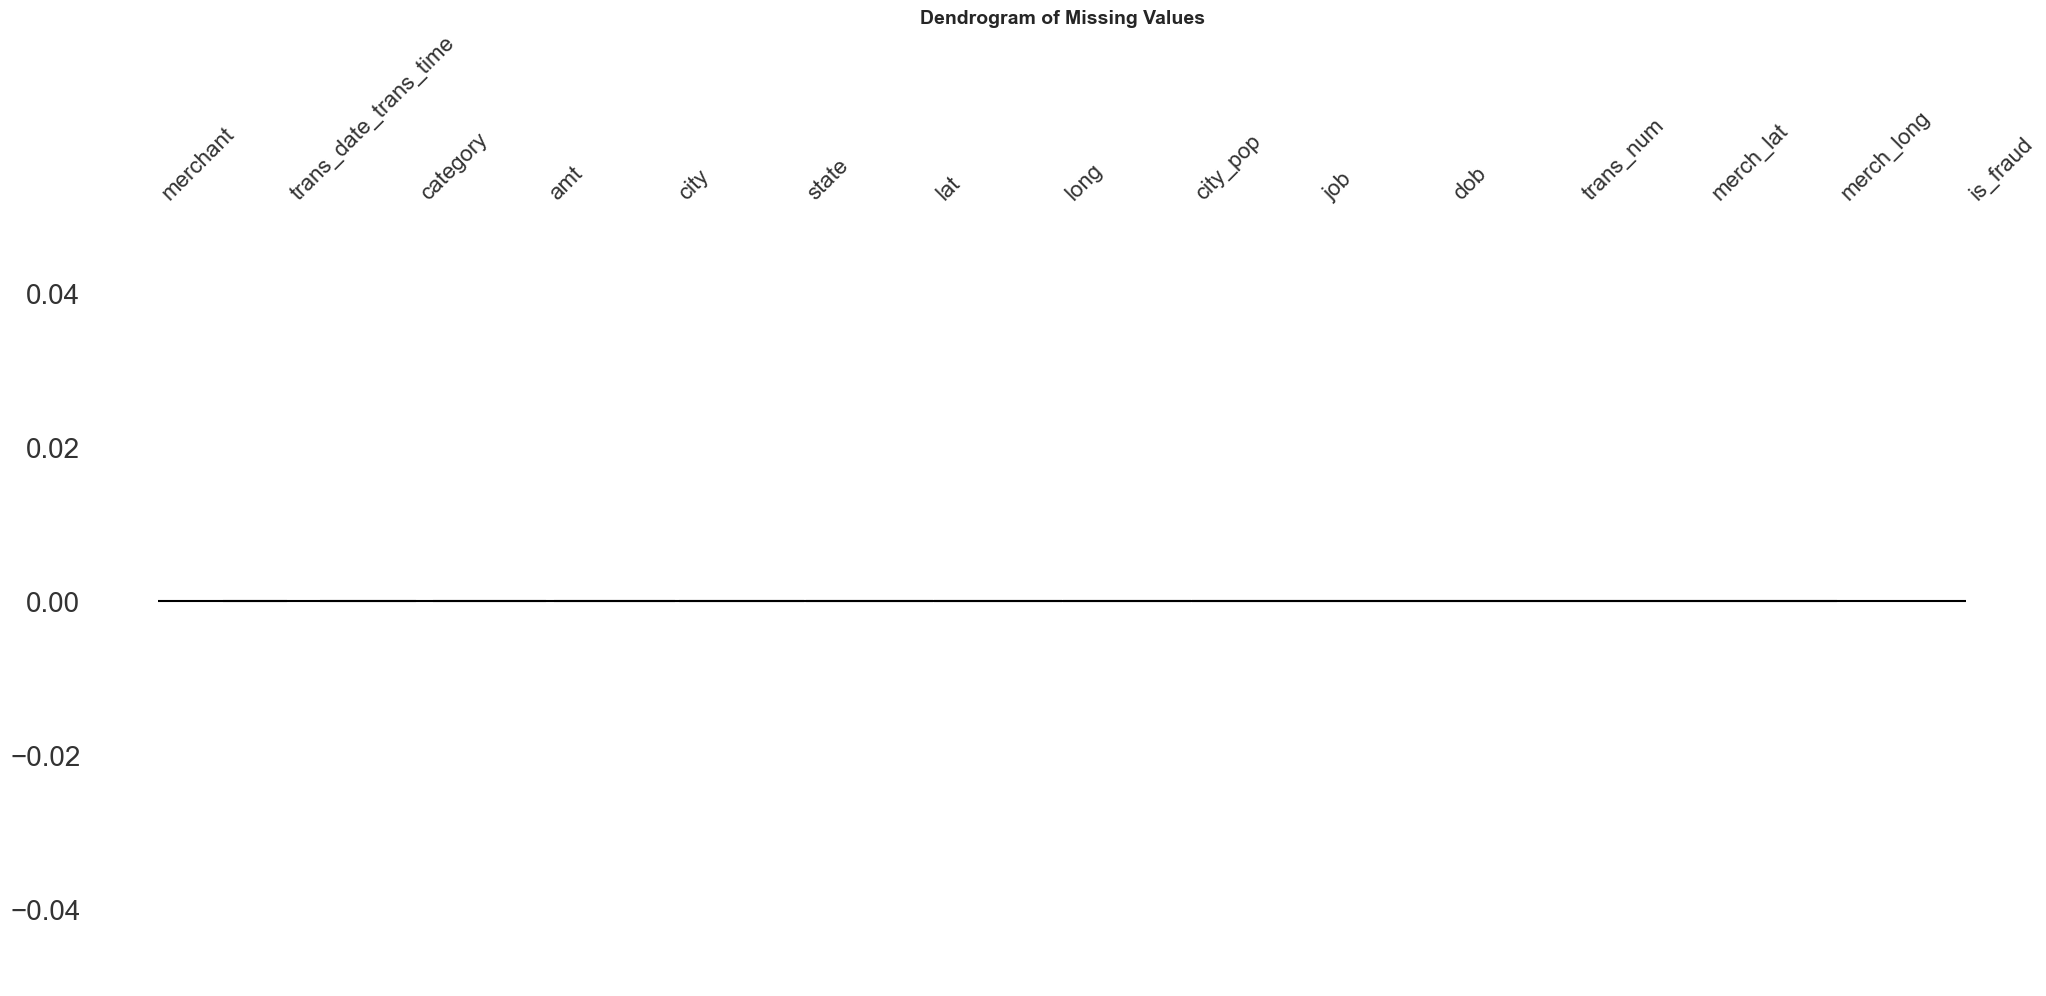

In [ ]:
# Membuat dendrogram untuk memvisualisasikan pola missing values pada kolom-kolom dataset
msno.dendrogram(data)
plt.title('Dendrogram of Missing Values')
plt.show()

### Class Imbalanced

#### Analisis Ketidakseimbangan Kelas pada Variabel `is_fraud`

Grafik ini menunjukkan distribusi kelas pada variabel target `is_fraud`, yang mengidentifikasi transaksi sebagai penipuan (fraud) atau bukan penipuan (non-fraud). Dari hasil plot, kita dapat melihat bahwa dataset ini memiliki ketidakseimbangan kelas yang signifikan:

- **Non-Fraud (0)**: Sebagian besar data transaksi, yaitu sekitar 88%, tidak teridentifikasi sebagai penipuan.
- **Fraud (1)**: Hanya sekitar 12% dari total data yang teridentifikasi sebagai penipuan.

Ketidakseimbangan kelas ini harus diperhatikan dalam proses pemodelan, karena model mungkin cenderung mengabaikan kelas minoritas (fraud) jika tidak dilakukan penyesuaian khusus. Beberapa strategi yang dapat dipertimbangkan termasuk oversampling atau undersampling, serta pemilihan metrik evaluasi yang sesuai untuk mengukur performa model pada kelas yang lebih kecil.


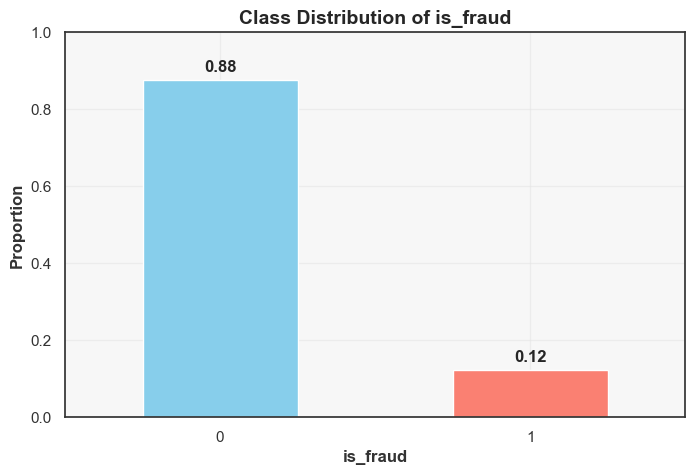

In [13]:
# Menghitung proporsi setiap kelas pada kolom 'is_fraud' untuk mengetahui distribusi data fraud dan non-fraud
class_counts = data['is_fraud'].value_counts(normalize=True)

# Membuat plot bar untuk menampilkan distribusi kelas 'is_fraud'
plt.figure(figsize=(8, 5))  # Mengatur ukuran figure
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])  # Membuat plot dengan warna berbeda untuk setiap kelas
plt.title('Class Distribution of is_fraud')  # Menambahkan judul pada plot
plt.xlabel('is_fraud')  # Menambahkan label pada sumbu x
plt.ylabel('Proportion')  # Menambahkan label pada sumbu y
plt.xticks(rotation=0)  # Mengatur rotasi label pada sumbu x agar mudah dibaca
plt.ylim(0, 1)  # Mengatur batas atas sumbu y untuk proporsi (0 hingga 1)

# Menambahkan label nilai proporsi di atas setiap batang pada plot
for index, value in enumerate(class_counts):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, weight='bold')

# Menampilkan plot
plt.show()

## Univariate Analysis

### Univariate Analysis of Categorical Variables

Pada bagian ini, kita melakukan *univariate analysis* untuk memahami distribusi dari variabel-variabel kategori utama dalam dataset deteksi penipuan:

1. **Top 10 Merchants**: Menunjukkan merchant-merchant teratas yang paling sering digunakan dalam transaksi. Ini dapat membantu kita mengenali merchant populer dalam data.
2. **Transaction Category Distribution**: Menampilkan frekuensi transaksi berdasarkan kategori barang. Ini memberikan informasi tentang jenis transaksi yang paling umum dilakukan.
3. **Top 10 Cities**: Menunjukkan kota-kota dengan frekuensi transaksi tertinggi. Hal ini bermanfaat untuk melihat lokasi geografis dengan volume transaksi terbesar.
4. **Top 10 Jobs**: Menampilkan pekerjaan pengguna yang paling sering melakukan transaksi. Ini dapat memberikan wawasan tentang kelompok pekerjaan yang aktif dalam bertransaksi.

Analisis ini memberi kita gambaran awal tentang karakteristik dasar dataset, yang dapat berguna dalam memahami konteks data dan potensi pola yang terkait dengan penipuan.


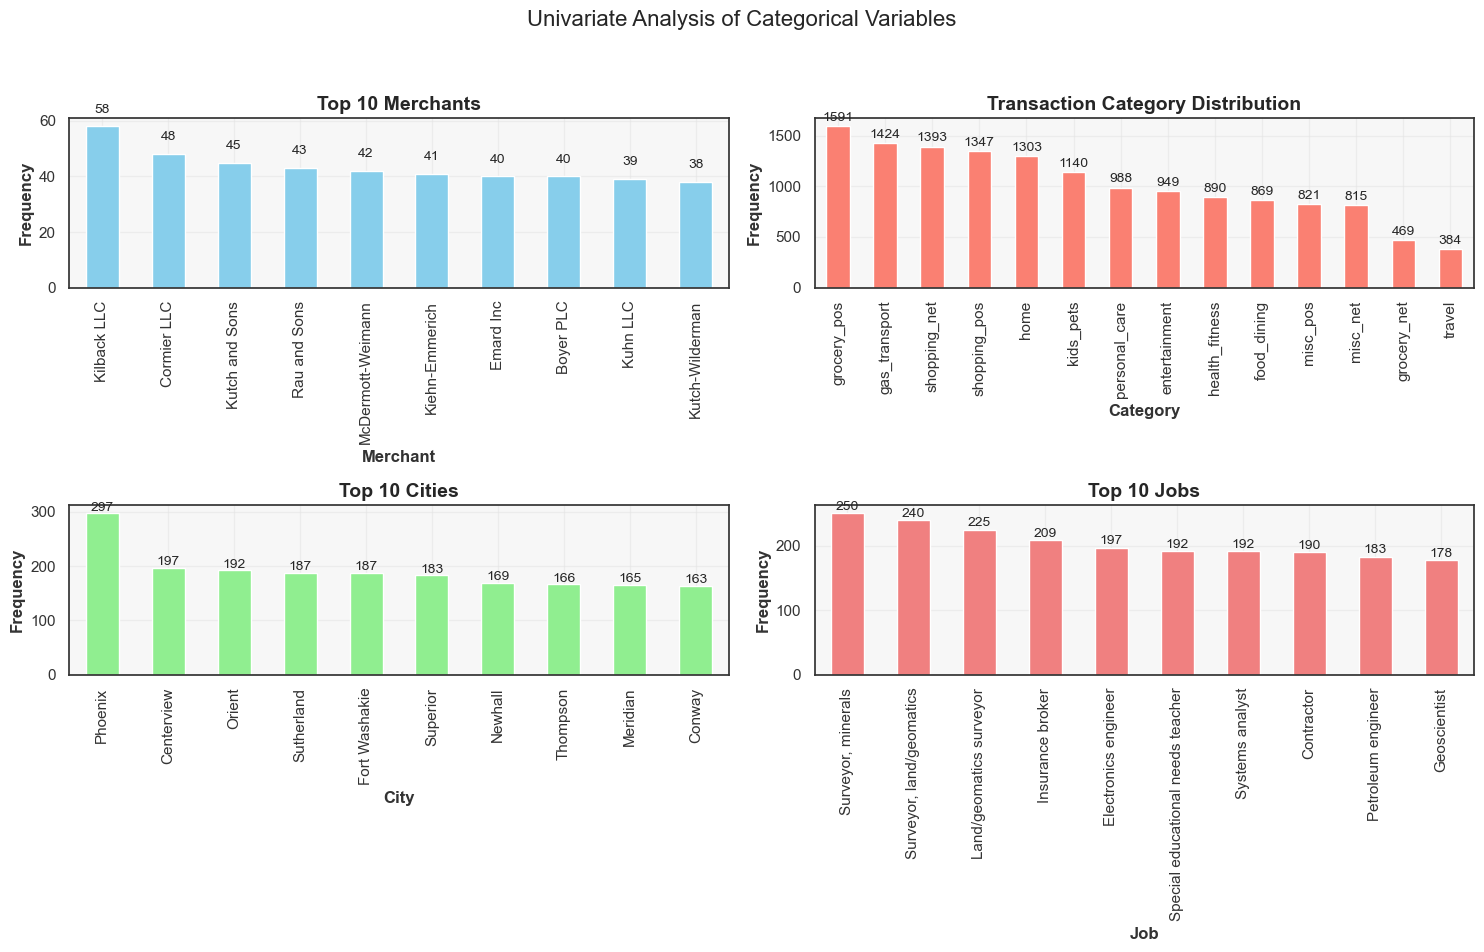

In [25]:
# Menambahkan nilai label di atas setiap batang pada bar chart untuk variabel kategori

# Mengatur subplots untuk menampilkan beberapa variabel kategori
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis of Categorical Variables', fontsize=16)

# Plot untuk variabel 'merchant'
merchant_counts = data['merchant'].value_counts().head(10)
merchant_counts.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Top 10 Merchants')  # Judul plot untuk 10 merchant teratas
axs[0, 0].set_xlabel('Merchant')  # Label sumbu x
axs[0, 0].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(merchant_counts):
    axs[0, 0].text(i, value + 5, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'category'
category_counts = data['category'].value_counts()
category_counts.plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Transaction Category Distribution')  # Judul plot untuk distribusi kategori transaksi
axs[0, 1].set_xlabel('Category')  # Label sumbu x
axs[0, 1].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(category_counts):
    axs[0, 1].text(i, value + 50, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'city'
city_counts = data['city'].value_counts().head(10)
city_counts.plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Top 10 Cities')  # Judul plot untuk 10 kota teratas
axs[1, 0].set_xlabel('City')  # Label sumbu x
axs[1, 0].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(city_counts):
    axs[1, 0].text(i, value + 5, f"{value}", ha='center', fontsize=10)

# Plot untuk variabel 'job'
job_counts = data['job'].value_counts().head(10)
job_counts.plot(kind='bar', ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Top 10 Jobs')  # Judul plot untuk 10 pekerjaan teratas
axs[1, 1].set_xlabel('Job')  # Label sumbu x
axs[1, 1].set_ylabel('Frequency')  # Label sumbu y
# Menambahkan label di atas setiap batang
for i, value in enumerate(job_counts):
    axs[1, 1].text(i, value + 5, f"{value}", ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Mengatur layout plot agar lebih rapi
plt.show()  # Menampilkan plot


#### Analisis Nilai Unik dan Frekuensi pada Variabel Kategori

Untuk memahami lebih lanjut distribusi data pada variabel-variabel kategori, berikut ini adalah analisis jumlah nilai unik dan frekuensi kemunculannya dalam dataset. Tabel berikut merangkum:

- **Jumlah Nilai Unik**: Menunjukkan berapa banyak nilai unik yang terdapat dalam setiap variabel kategori, seperti `merchant`, `category`, `city`, `state`, dan `job`.
- **Top Nilai dan Frekuensinya**: Menampilkan lima nilai teratas beserta frekuensinya untuk setiap variabel kategori. Ini memberikan gambaran mengenai nilai-nilai yang paling sering muncul dalam dataset.

Informasi ini berguna untuk mengidentifikasi apakah ada konsentrasi nilai tertentu dalam kategori, yang mungkin menjadi indikasi pola tertentu dalam data.


In [20]:
# Menghitung jumlah nilai unik dan frekuensi kemunculannya untuk setiap variabel kategori
unique_values_counts = {}

# Looping pada setiap kolom kategori untuk menghitung nilai unik dan frekuensinya
for col in ['merchant', 'category', 'city', 'state', 'job']:
    unique_counts = data[col].value_counts()
    unique_values_counts[col] = {
        'Jumlah Nilai Unik': unique_counts.nunique(),
        'Frekuensi Nilai': unique_counts.to_dict()
    }

# Menampilkan hasil dalam bentuk DataFrame untuk memudahkan visualisasi
unique_values_summary = pd.DataFrame({
    'Jumlah Nilai Unik': {col: unique_values_counts[col]['Jumlah Nilai Unik'] for col in unique_values_counts},
    'Top Nilai dan Frekuensinya': {col: list(unique_values_counts[col]['Frekuensi Nilai'].items())[:5] for col in unique_values_counts}  # Menampilkan hanya 5 teratas
})


unique_values_summary


,Jumlah Nilai Unik,Top Nilai dan Frekuensinya
merchant,44,"[(Kilback LLC, 58), (Cormier LLC, 48), (Kutch ..."
category,14,"[(grocery_pos, 1591), (gas_transport, 1424), (..."
city,106,"[(Phoenix, 297), (Centerview, 197), (Orient, 1..."
state,13,"[(CA, 3366), (MO, 2324), (NE, 1438), (OR, 1211..."
job,105,"[(Surveyor, minerals, 250), (Surveyor, land/ge..."


### Analisis Univariat untuk Variabel Numerik (Tanpa Latitude dan Longitude)

Bagian ini menampilkan analisis univariat untuk variabel numerik utama dalam dataset, dengan fokus pada variabel `amt` (jumlah transaksi) dan `city_pop` (populasi kota):

1. **Distribusi Jumlah Transaksi (`amt`)**: Sebagian besar transaksi berada pada rentang jumlah yang rendah, dengan distribusi yang skew ke kanan. Beberapa transaksi dengan jumlah sangat tinggi dapat menjadi outliers dan mungkin menarik untuk dianalisis lebih lanjut sebagai potensi penipuan.

2. **Distribusi Populasi Kota (`city_pop`)**: Distribusi populasi kota menunjukkan bahwa sebagian besar pengguna berasal dari kota-kota berpopulasi kecil, dengan distribusi yang sangat skew ke kanan. Hal ini bisa memberikan gambaran tentang karakteristik geografis dari pengguna kartu kredit dalam dataset ini.

Analisis distribusi ini membantu kita memahami pola dasar dalam variabel numerik dan mengidentifikasi potensi outliers atau pola khusus yang relevan dalam konteks deteksi penipuan.


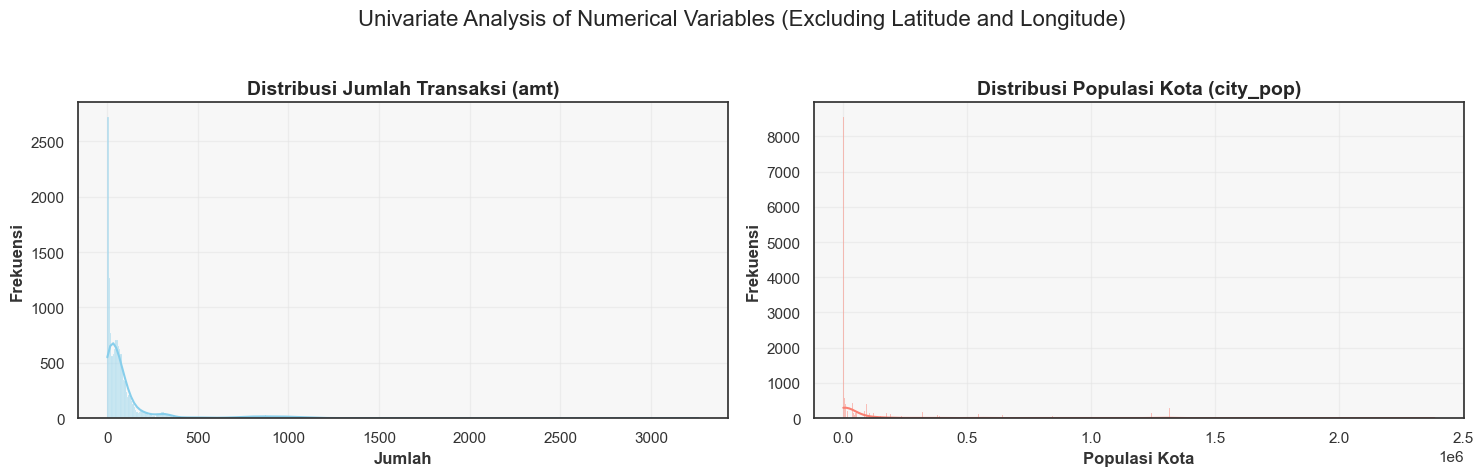

In [24]:
# Analisis univariat untuk variabel numerik (tanpa variabel Latitude dan Longitude)
# Fokus pada variabel 'amt' (jumlah transaksi) dan 'city_pop' (populasi kota)

# Mengatur subplots untuk variabel numerik terpilih
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate Analysis of Numerical Variables (Excluding Latitude and Longitude)', fontsize=16)

# Plot distribusi untuk 'amt' (jumlah transaksi)
sns.histplot(data['amt'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribusi Jumlah Transaksi (amt)')  # Judul plot untuk jumlah transaksi
axs[0].set_xlabel('Jumlah')  # Label sumbu x
axs[0].set_ylabel('Frekuensi')  # Label sumbu y

# Plot distribusi untuk 'city_pop' (populasi kota)
sns.histplot(data['city_pop'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribusi Populasi Kota (city_pop)')  # Judul plot untuk populasi kota
axs[1].set_xlabel('Populasi Kota')  # Label sumbu x
axs[1].set_ylabel('Frekuensi')  # Label sumbu y

# Mengatur layout plot agar lebih rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan plot
plt.show()


### Analisis Variabel Temporal: Distribusi Waktu Transaksi dan Usia Pengguna

Pada bagian ini, dilakukan analisis untuk memahami pola waktu dan karakteristik demografis pengguna berdasarkan variabel waktu dalam dataset:

1. **Distribusi Transaksi Berdasarkan Hari dalam Seminggu**: Plot ini menunjukkan frekuensi transaksi untuk masing-masing hari dalam seminggu, membantu kita mengenali apakah ada hari tertentu yang lebih sibuk dalam hal volume transaksi. Hal ini dapat memberikan wawasan mengenai tren mingguan dari aktivitas transaksi.

2. **Distribusi Transaksi Berdasarkan Jam dalam Sehari**: Plot ini menampilkan pola transaksi berdasarkan jam dalam sehari. Dari plot ini, kita bisa melihat waktu-waktu puncak transaksi dalam sehari, seperti adanya kenaikan transaksi pada jam-jam tertentu yang mungkin berkaitan dengan kebiasaan pengguna.

3. **Distribusi Usia Pengguna**: Plot ini menunjukkan distribusi usia pengguna berdasarkan tanggal lahir (dob). Dengan menghitung usia, kita bisa melihat kelompok usia mana yang paling sering melakukan transaksi, yang dapat menjadi informasi penting dalam memahami profil demografis pengguna kartu.

Analisis ini membantu dalam mengidentifikasi pola temporal dan demografis yang mungkin relevan dalam konteks deteksi penipuan.


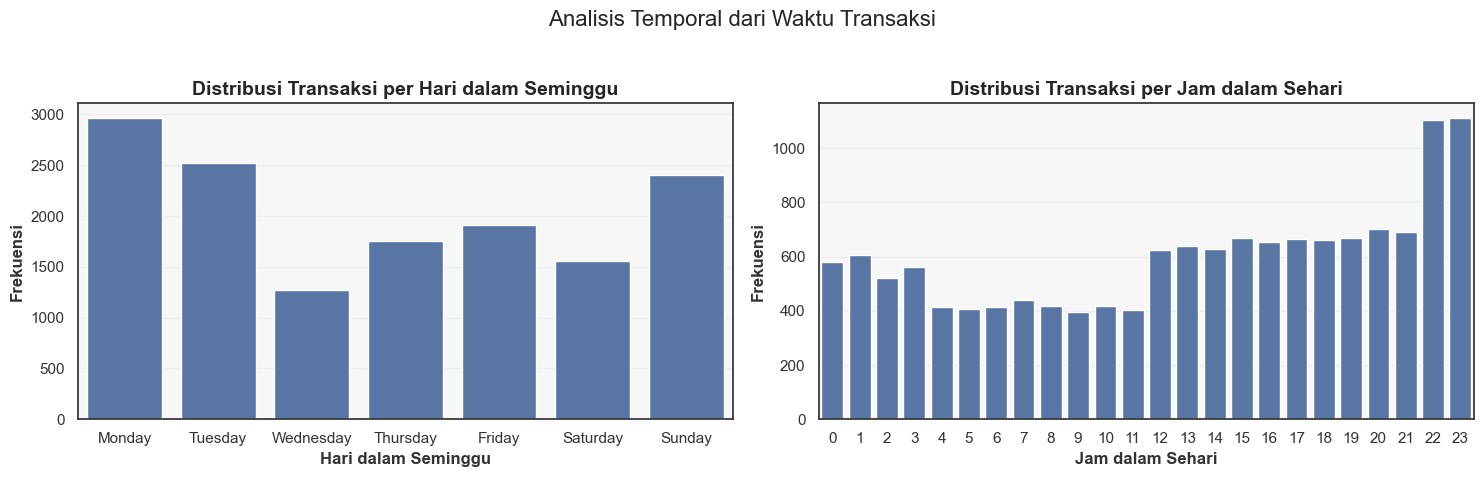

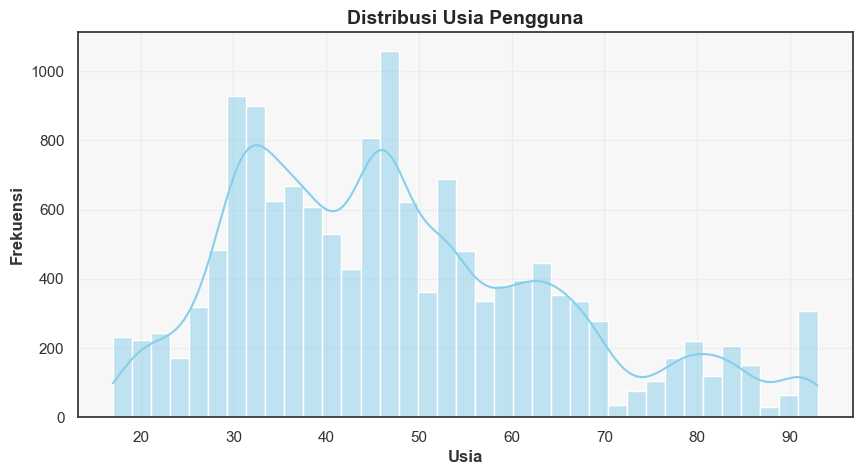

In [29]:
# EDA untuk Variabel Temporal: Analisis 'trans_date_trans_time' dan 'dob'

# Mengonversi kolom 'trans_date_trans_time' ke tipe datetime jika belum, kemudian mengekstrak hari dalam seminggu dan jam transaksi
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()  # Mendapatkan nama hari
data['hour'] = data['trans_date_trans_time'].dt.hour  # Mendapatkan jam transaksi

# Membuat plot distribusi transaksi berdasarkan hari dalam seminggu dan jam dalam sehari
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analisis Temporal dari Waktu Transaksi', fontsize=16)

# Plot distribusi transaksi berdasarkan hari dalam seminggu
sns.countplot(data=data, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axs[0])
axs[0].set_title('Distribusi Transaksi per Hari dalam Seminggu')
axs[0].set_xlabel('Hari dalam Seminggu')  # Menambahkan label pada sumbu x
axs[0].set_ylabel('Frekuensi')  # Menambahkan label pada sumbu y

# Plot distribusi transaksi berdasarkan jam dalam sehari
sns.countplot(data=data, x='hour', ax=axs[1])
axs[1].set_title('Distribusi Transaksi per Jam dalam Sehari')
axs[1].set_xlabel('Jam dalam Sehari')  # Menambahkan label pada sumbu x
axs[1].set_ylabel('Frekuensi')  # Menambahkan label pada sumbu y

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Mengatur layout plot agar rapi
plt.show()  # Menampilkan plot

# Menghitung usia berdasarkan 'dob' dan membuat plot distribusi usia
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365  # Menghitung usia dalam tahun

# Membuat plot distribusi usia pengguna
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


## Bivariate Analysis

### Informasi dari Visualisasi Bivariat

1. **Distribusi Jumlah Transaksi Berdasarkan `is_fraud` (Violin Plot)**:
   - Plot ini menunjukkan bahwa transaksi yang ditandai sebagai penipuan (`is_fraud = 1`) memiliki distribusi jumlah transaksi yang lebih tersebar dibandingkan dengan transaksi normal (`is_fraud = 0`).
   - Mayoritas transaksi penipuan cenderung memiliki jumlah transaksi yang lebih tinggi dibandingkan dengan transaksi yang tidak ditandai sebagai penipuan, yang sebagian besar terkonsentrasi pada nilai yang lebih rendah.

2. **Mosaic Plot of Category vs is_fraud**:
   - Kategori tertentu seperti `grocery_pos`, `shopping_net` dan `misc_net` memiliki proporsi penipuan yang lebih tinggi dibandingkan dengan kategori lainnya, terlihat dari kotak `is_fraud = 1` yang lebih besar di kategori tersebut.

3. **Mosaic Plot of Day of Week vs is_fraud**:
   - Plot ini menunjukkan bahwa penipuan cenderung lebih banyak terjadi pada hari kerja, terutama pada **Senin** dan **Selasa**.
   - Hari-hari seperti Sabtu dan Minggu memiliki jumlah penipuan yang lebih sedikit, yang mungkin mencerminkan aktivitas penipuan yang lebih tinggi selama hari kerja dibandingkan dengan akhir pekan.

Informasi dari visualisasi ini dapat membantu mengidentifikasi pola pada transaksi penipuan berdasarkan jumlah transaksi, kategori barang, dan waktu transaksi dalam seminggu.


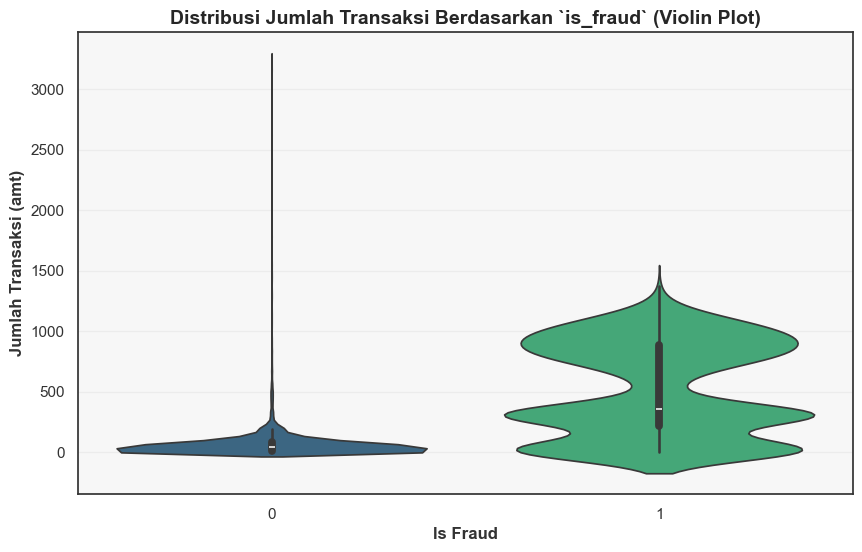

<Figure size 1800x1000 with 0 Axes>

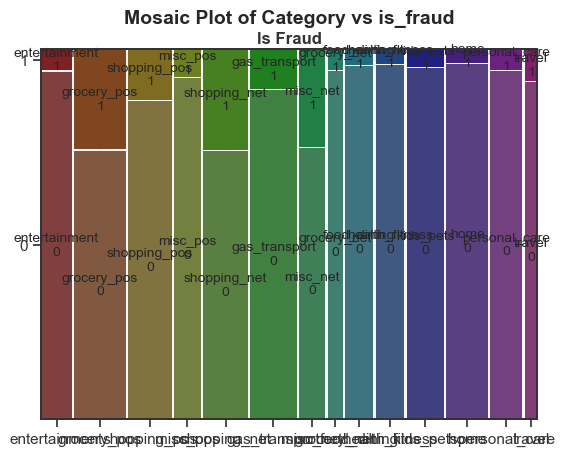

<Figure size 1600x800 with 0 Axes>

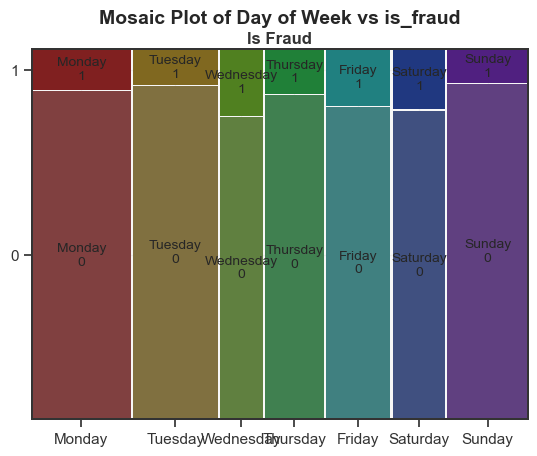

In [ ]:
# Plot violin untuk melihat distribusi jumlah transaksi (`amt`) berdasarkan status penipuan (`is_fraud`)
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='is_fraud', y='amt', hue='is_fraud', dodge=False, palette='viridis', legend=False)
plt.title('Distribusi Jumlah Transaksi Berdasarkan `is_fraud` (Violin Plot)')
plt.xlabel('Is Fraud')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Mengatur urutan `day_of_week` dari Senin hingga Minggu agar lebih rapi dan sesuai kronologi
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=day_order, ordered=True)

# Plot mosaic untuk melihat hubungan antara `category` dan `is_fraud` dengan tampilan lebih besar dan label miring
plt.figure(figsize=(18, 10))
mosaic(data, ['category', 'is_fraud'], title='Mosaic Plot of Category vs is_fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Category')
plt.xticks(rotation=90, fontsize=10, style='italic')  # Label sumbu x diputar 90 derajat dan dimiringkan
plt.yticks(fontsize=10, style='italic')  # Label sumbu y dimiringkan
plt.show()

# Plot mosaic untuk melihat hubungan antara `day_of_week` dan `is_fraud` dengan urutan hari yang benar
plt.figure(figsize=(16, 8))
mosaic(data.sort_values('day_of_week'), ['day_of_week', 'is_fraud'], title='Mosaic Plot of Day of Week vs is_fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Day of Week')
plt.xticks(rotation=45, fontsize=10, style='italic')  # Label sumbu x diputar 45 derajat dan dimiringkan
plt.yticks(fontsize=10, style='italic')  # Label sumbu y dimiringkan
plt.show()

### Analisis Visualisasi Hubungan antara Jarak, Populasi Kota, Usia, dan Jumlah Transaksi (amt) terhadap Status Penipuan (`is_fraud`)

Berdasarkan visualisasi berikut, kita dapat menarik beberapa kesimpulan awal mengenai variabel-variabel yang mungkin berpengaruh terhadap status penipuan (`is_fraud`):

1. **Distribusi Jarak antara Pengguna dan Merchant Berdasarkan Status Penipuan**:
   - Histogram ini menunjukkan distribusi jarak antara pengguna dan merchant dalam transaksi. 
   - Tidak ada pola yang jelas yang menunjukkan bahwa jarak antara pengguna dan merchant secara signifikan memengaruhi status penipuan. Penipuan terjadi pada berbagai jarak yang cukup merata.

2. **Hubungan antara Jarak dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini memperlihatkan bahwa meskipun ada beberapa transaksi penipuan pada berbagai jarak, jumlah transaksi (`amt`) tampaknya lebih bervariasi dan menunjukkan pola tertentu.
   - Transaksi dengan jumlah yang lebih besar tampak lebih rentan terhadap penipuan, meskipun jaraknya bervariasi.

3. **Hubungan antara Populasi Kota dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini menunjukkan bahwa populasi kota (`city_pop`) pengguna tidak memiliki korelasi yang jelas dengan status penipuan.
   - Penipuan terjadi baik di kota berpopulasi kecil maupun besar, sehingga populasi kota tampaknya tidak berpengaruh secara signifikan terhadap penipuan.

4. **Hubungan antara Usia dan Jumlah Transaksi Berdasarkan Status Penipuan**:
   - Scatter plot ini memperlihatkan bahwa usia pengguna tidak memiliki hubungan yang jelas dengan status penipuan.
   - Penipuan terjadi pada berbagai kelompok usia dan tidak menunjukkan pola khusus.

Dari keempat visualisasi di atas, **jumlah transaksi (`amt`) tampaknya menjadi variabel yang paling berpengaruh terhadap status penipuan** (`is_fraud`). Transaksi dengan jumlah yang lebih besar tampaknya lebih sering dikaitkan dengan penipuan, meskipun jarak, populasi kota, dan usia tidak menunjukkan pengaruh yang signifikan. Analisis ini menunjukkan pentingnya `amt` sebagai variabel yang potensial dalam mendeteksi penipuan.


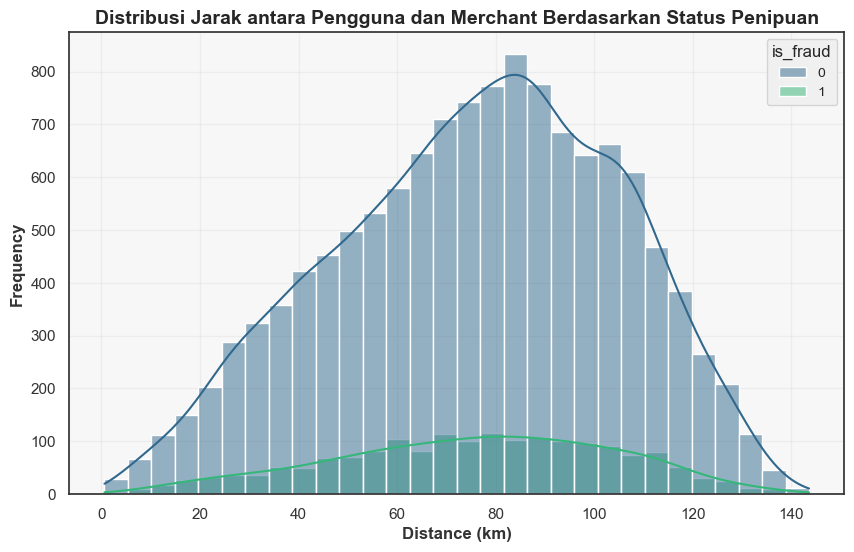

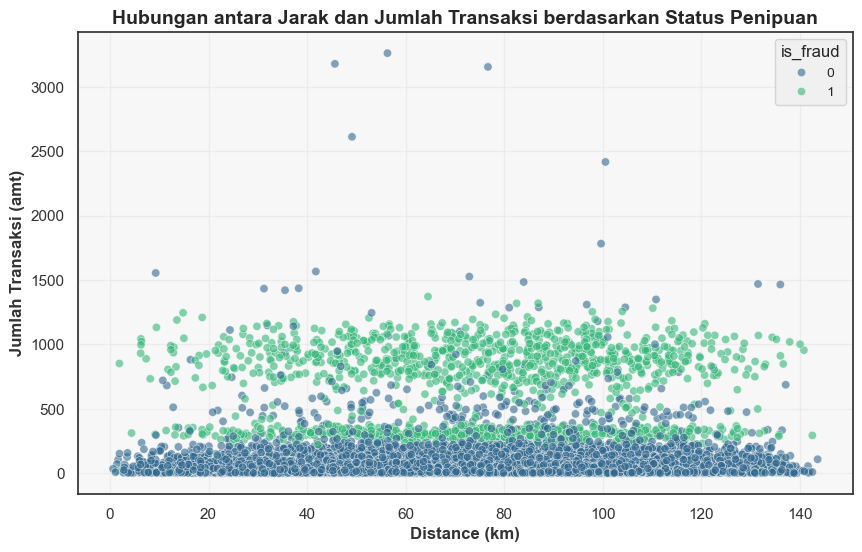

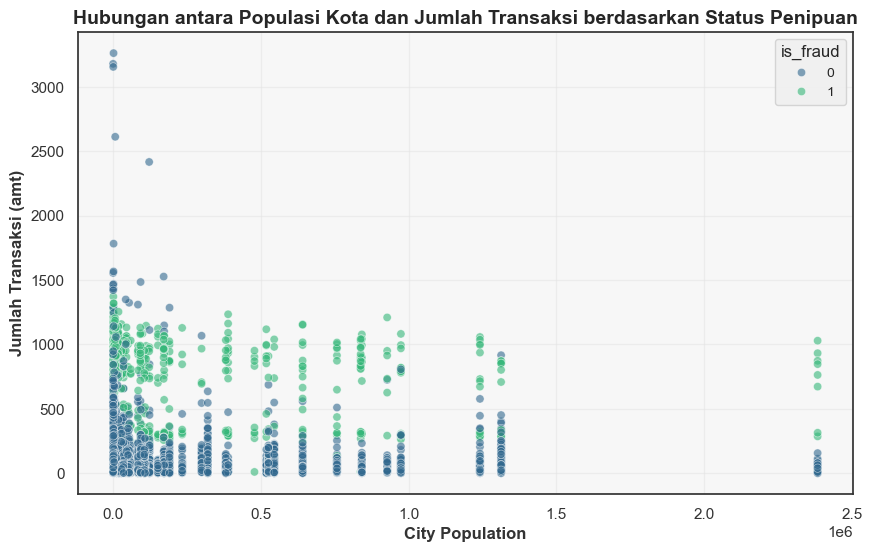

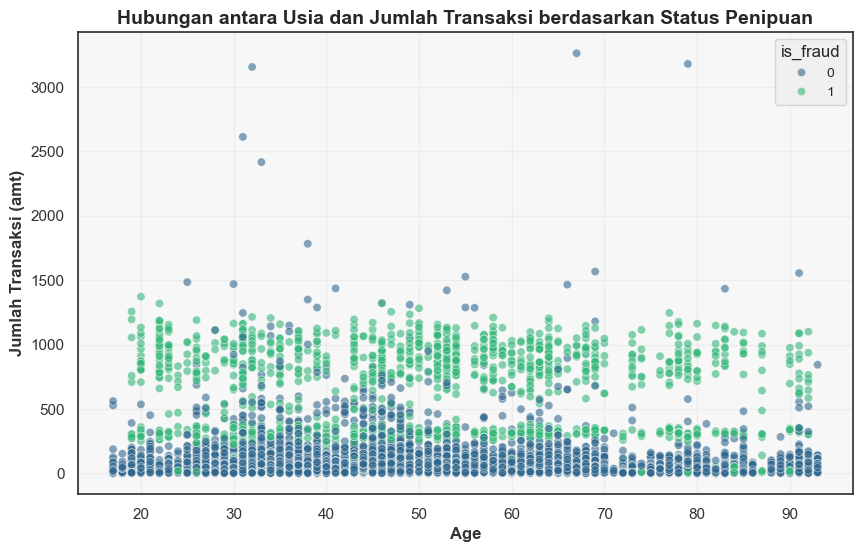

In [47]:
# Fungsi untuk menghitung jarak antara pengguna dan merchant menggunakan formula Haversine
# Formula ini menghitung jarak berdasarkan koordinat latitude dan longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam kilometer
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Mengembalikan jarak dalam kilometer

# Menghitung jarak antara pengguna dan merchant untuk setiap transaksi, dan menambahkannya sebagai kolom baru
data['distance_km'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

# Visualisasi distribusi jarak antara pengguna dan merchant, dikelompokkan berdasarkan status penipuan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='distance_km', hue='is_fraud', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Jarak antara Pengguna dan Merchant Berdasarkan Status Penipuan')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot untuk melihat hubungan antara jarak dan jumlah transaksi, serta status penipuan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance_km', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Jarak dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('Distance (km)')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Scatter plot untuk melihat hubungan antara populasi kota pengguna dan jumlah transaksi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='city_pop', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Populasi Kota dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('City Population')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()

# Scatter plot untuk melihat hubungan antara usia pengguna dan jumlah transaksi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='amt', hue='is_fraud', palette='viridis', alpha=0.6)
plt.title('Hubungan antara Usia dan Jumlah Transaksi berdasarkan Status Penipuan')
plt.xlabel('Age')
plt.ylabel('Jumlah Transaksi (amt)')
plt.show()